<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Данные-по-пользователям-по-типам-событий" data-toc-modified-id="Данные-по-пользователям-по-типам-событий-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Данные по пользователям по типам событий</a></span></li><li><span><a href="#Данные-по-пользователям-по-типу-построенных-объектов" data-toc-modified-id="Данные-по-пользователям-по-типу-построенных-объектов-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Данные по пользователям по типу построенных объектов</a></span></li><li><span><a href="#Даты-событий:-наиболее-и-наименее-пиковые-дни" data-toc-modified-id="Даты-событий:-наиболее-и-наименее-пиковые-дни-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Даты событий: наиболее и наименее пиковые дни</a></span></li></ul></li><li><span><a href="#Влияние-типа-источника-на-вероятность-завершения-первого-уровня" data-toc-modified-id="Влияние-типа-источника-на-вероятность-завершения-первого-уровня-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Влияние типа источника на вероятность завершения первого уровня</a></span></li><li><span><a href="#Среднее-время-прохождения-при-разных-сценариях" data-toc-modified-id="Среднее-время-прохождения-при-разных-сценариях-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Среднее время прохождения при разных сценариях</a></span></li><li><span><a href="#Оптимальная-модель-монетизации" data-toc-modified-id="Оптимальная-модель-монетизации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Оптимальная модель монетизации</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

# Дополнительные материалы

1. [Презентация](https://drive.google.com/file/d/15AqeQ1WLkemcVlLMIGLqJJ--mQDnahG8/view)
2. [Дашборд](https://public.tableau.com/app/profile/el7854/viz/_16345036384940/Dashboard1)

## Описание проекта

Основная задача — предложить оптимальное количество и время для показа рекламы (далее - модель монетизации), чтобы окупить пользователей первого уровня. Задачи заработать как можно больше на рекламы перед заказчиком не стоит, необходим вариант с минимальным количеством рекламы для сокращения потенциального оттока из-за рекламы.

В основном датасете содержатся данные первых пользователей приложения — игроков, которые начали пользоваться приложением в период с 4 по 10 мая включительно. 
В двух дополнительных датасетах представлены данные о пользователях и источниках их привлечения, а также сведения о расходах на маркетинг по источникам. Данных по оттоку пользователей в датасетах нет.

В проекте все суммы указаны в долларах, так как стоимость показа рекламы рассчитывается в этой валюте.

## Предобработка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from scipy import stats as st
from statsmodels.stats.proportion import proportions_ztest
from operator import attrgetter
# чтобы убрать ошибку FutureWarning
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
ads = pd.read_csv('ad_costs.csv')
sources = pd.read_csv('user_source.csv')
actions = pd.read_csv('game_actions.csv')

In [3]:
print("ads дубликаты и пропущенные значения:", ads.duplicated().sum(), ads.isnull().sum().sum())
display(ads.head())
display(ads.info())
display(ads.describe())

ads дубликаты и пропущенные значения: 0 0


,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
source    28 non-null object
day       28 non-null object
cost      28 non-null float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


None

,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


In [4]:
print("sources дубликаты и пропущенные значения:", sources.duplicated().sum(), sources.isnull().sum().sum())
display(sources.head())
display(sources.info())
display(sources.describe())

sources дубликаты и пропущенные значения: 0 0


,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
user_id    13576 non-null object
source     13576 non-null object
dtypes: object(2)
memory usage: 212.2+ KB


None

,user_id,source
count,13576,13576
unique,13576,4
top,4b0059c7-e85d-4141-8d8a-48b24d61b97f,yandex_direct
freq,1,4817


In [5]:
print("actions дубликаты и пропущенные значения:", actions.duplicated().sum(), actions.isnull().sum().sum())
display(actions.head())
display(actions.info())
display(actions.describe())

actions дубликаты и пропущенные значения: 1 141457


,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
event_datetime    135640 non-null object
event             135640 non-null object
building_type     127957 non-null object
user_id           135640 non-null object
project_type      1866 non-null object
dtypes: object(5)
memory usage: 5.2+ MB


None

,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-07 17:57:40,building,spaceport,d6aca06a-cd75-4cd8-b8cd-240a3c163884,satellite_orbital_assembly
freq,4,127957,59325,22,1866


В датасетах с данными по рекламе и источникам нет пропущенных значений и дубликатов. Набор ad_cost состоит из 28 строк и 3 столбцов и содержит данные по расходам на привлечение пользователей по каждому источнику за период с 3 по 9 мая 2020 года. Датасет user_source состоит из 13576 строк и 2 столбцов с данными о пользователях и источнике, из которого они пришли.

Основной датасет с данными о событиях, совершенных в мобильной игре «Космические братья» гораздо объемнее: он содержит 135460 строк и 5 столбцов. В нем также есть пропущенные значения в столбцах *building type*, *project_type*, однако это логично и объясняется тем, что не все события связаны со строительством или выполнением проектов, поэтому исключать или заполнять эти данные мы не будем.

In [6]:
# переведем дату в корректный формат
actions['event_datetime'] = pd.to_datetime(actions['event_datetime'])

## Исследовательский анализ данных

### Данные по пользователям по типам событий

In [7]:
# посчитаем количество действий пользователей по каждому событию 
actions.groupby('event').agg({'user_id':'count'})

,user_id
event,
building,127957
finished_stage_1,5817
project,1866


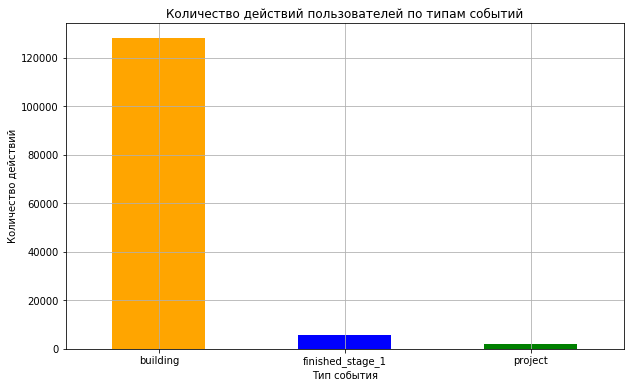

In [8]:
color = ['orange','blue','green']
actions.groupby('event').agg({'user_id':'count'}).plot(
    kind='bar', rot=0, y=0, color=color,
    figsize=(10,6), grid=True, legend=False);
plt.title('Количество действий пользователей по типам событий')
plt.xlabel('Тип события');
plt.ylabel('Количество действий');

In [9]:
# также проверим уникальных пользователей по каждому событию
actions.groupby('event').agg({'user_id':'nunique'})

,user_id
event,
building,13576
finished_stage_1,5817
project,1866


Как видно на графике выше количество событий building в десятки раз больше, чем событий finisihed_stage_1 и project. Посмотрев на количество уникальных пользователей по каждому типу события, можно заметить, что строительством занимались все пользователи в базе (в среднем по 9 раз за первый уровень), тогда как количество выполненных проектов и завершений уровня не изменилось. 

Это объясняется различиями в логике событий в структуре игры: строительство — это действие, которое встречается не неоднократно на протяжении уровня (а в целом и всей игры) и может повторяться много раз (каждый игрок может строить множество зданий), тогда как завершение первого уровня и завершение проекта может произойти только один раз для каждого игрока. 

### Данные по пользователям по типу построенных объектов

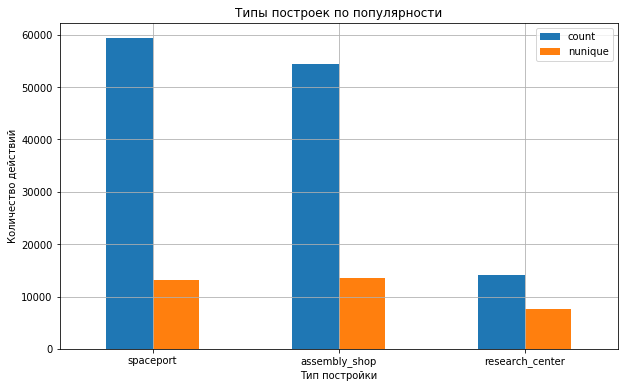

In [10]:
# посмотрим на пользователей по типу построенных объектов
actions.groupby('building_type')['user_id'].agg(
    ['count', 'nunique']).sort_values('count', ascending=False).plot(
    kind='bar', grid=True,
    figsize=(10,6), rot=0);

plt.title('Типы построек по популярности')
plt.xlabel('Тип постройки');
plt.ylabel('Количество действий');

In [11]:
print(actions.groupby('building_type')['user_id'].count().sum(), 
      'зданий всего построено на первом уровне')

127957 зданий всего построено на первом уровне


Всего на первом уровне три типа объекта для строительства: сборочный цех, исследовательский центр и космический порт.
Чаще всего пользователи строили здание порта и сборочного цеха, реже всего исследовательский центр. При этом если посмотреть на количество уникальных пользователей построивших каждый из объектов, то видно, что в этом случае разница между типами построек уже не так велика. Вероятно, это связано с тем, что порт и цех строятся многократно в игре для ускорения прогресса, а исследовательский центр однократно.

Всего в игре построено 127957 зданий. 

###  Даты событий: наиболее и наименее пиковые дни

In [12]:
# проверим период активности пользователей в базе 
# посмотрим на самую первую и последнюю даты событий
display(actions['event_datetime'].min())
display(actions['event_datetime'].max())

Timestamp('2020-05-04 00:00:01')

Timestamp('2020-06-05 12:32:49')

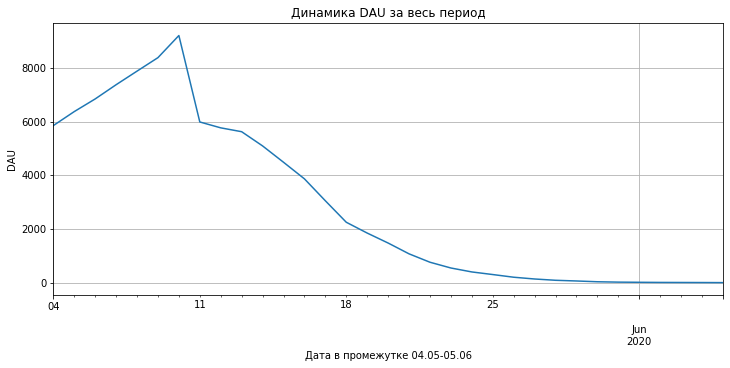

In [13]:
# посчитаем уникальных пользователей по дням и выведем графики
actions_metrics = actions.set_index(['event_datetime'])

dau = actions_metrics.resample('D').user_id.nunique()

dau.plot(figsize=(12,5), legend=False, grid=True, title='Динамика DAU за весь период');
plt.xlabel('Дата в промежутке 04.05-05.06')
plt.ylabel('DAU');

In [14]:
# посмотрим на расходы на привлечение по дням 
ads.groupby('day')[['cost']].sum().round(2).reset_index()

,day,cost
0,2020-05-03,3302.45
1,2020-05-04,1865.00
2,2020-05-05,1029.43
3,2020-05-06,620.48
4,2020-05-07,391.85
5,2020-05-08,242.77
6,2020-05-09,151.59


На графике DAU видно, что пиковое количество уникальных пользователей пришлось на первую неделю. Значение активных пользователей росло в первую неделю и достигла максимума 10 мая со значением около 10 тысяч активных пользователей. Начиная с 11 мая значение только снижалось и к концу рассматриваемого периода практически достигло нуля.

Наиболее активный период расходов на привлечение пользователей пришелся на первые 3 дня с 3 по 5 мая: следовательно с 4 по 7 мы должны были наблюдать наибольшее число установок. Однако пик пришелся на 10 мая и это может быть связано с тем, что в РФ эти даты праздничные (у людей просто больше времени на развлечения, а 9-10 мая также еще и выходные). Соответственно, некоторые пользователи могли скачать приложение раньше, но зашли именно в 9-10 мая. 

In [15]:
actions['session_date'] = actions['event_datetime'].dt.date

actions_new = actions.groupby('session_date').agg({'user_id':['count', 'nunique']})
actions_new.columns = ['n_sessions', 'n_users']
actions_new['sess_per_user'] = (actions_new['n_sessions'] / actions_new['n_users']).round(2)

In [16]:
print(round(actions_new['sess_per_user'].mean(), 2),
  '— среднее количество событий в день на одного пользователя')

1.33 — среднее количество событий в день на одного пользователя


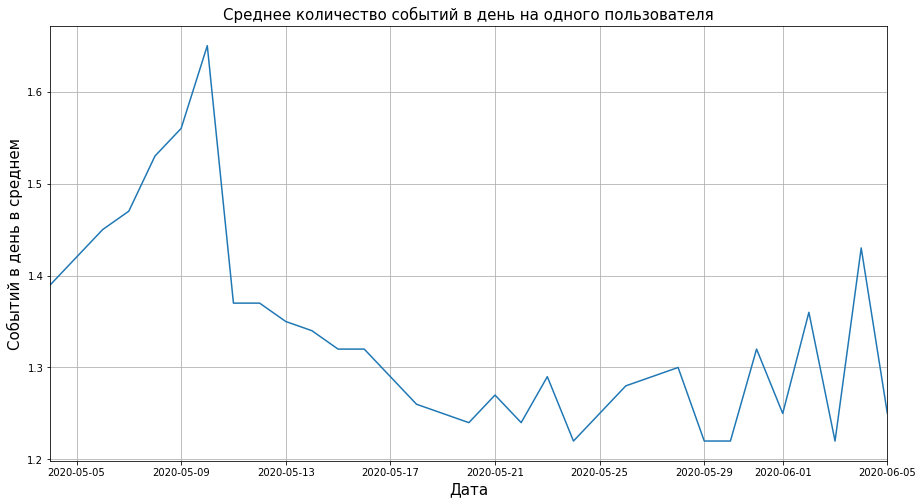

In [17]:
actions_new['sess_per_user'].plot(figsize=(15,8), grid=True);
plt.title('Среднее количество событий в день на одного пользователя', fontsize=15)
plt.xlabel('Дата', fontsize=15)
plt.ylabel('Событий в день в среднем', fontsize=15);

Среднее количество событий в день также достигло наивысшего значения 10 мая (около 1.6 сессий), далее резко упало до уровня ниже 1.4 события в день. Однако, в отличие от показателя уникальных активных пользователей до конца периода повышалось и понижалось несколько раз. В среднем, большую часть месяца значение находилась в пределах показателя 1.2-1.3 события в день.

In [18]:
# сделаем когортный анализ пользователей  
actions['session_day'] = actions['event_datetime'].dt.to_period('D')
actions['cohort'] = actions.groupby('user_id')['event_datetime'].transform('min').dt.to_period('D') 
actions_cohort = actions.groupby(['cohort', 'session_day']).agg(
    n_customers=('user_id', 'nunique')).reset_index(drop=False)

actions_cohort['date_diff'] = (actions_cohort['session_day'] - actions_cohort['cohort']).apply(attrgetter('n'))

In [19]:
# подготовим сводную таблицу и посчитаем размеры когорьы 
cohort_pivot = actions_cohort.pivot_table(index='cohort',
                                     columns='date_diff',
                                     values='n_customers')

cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis = 0)

In [20]:
# посмотрим на количество игроков в когортах
cohort_size

cohort
2020-05-04    5860.0
2020-05-05    3361.0
2020-05-06    1847.0
2020-05-07    1109.0
2020-05-08     688.0
2020-05-09     440.0
2020-05-10     271.0
Freq: D, Name: 0, dtype: float64

<a id='cell23'><a/>

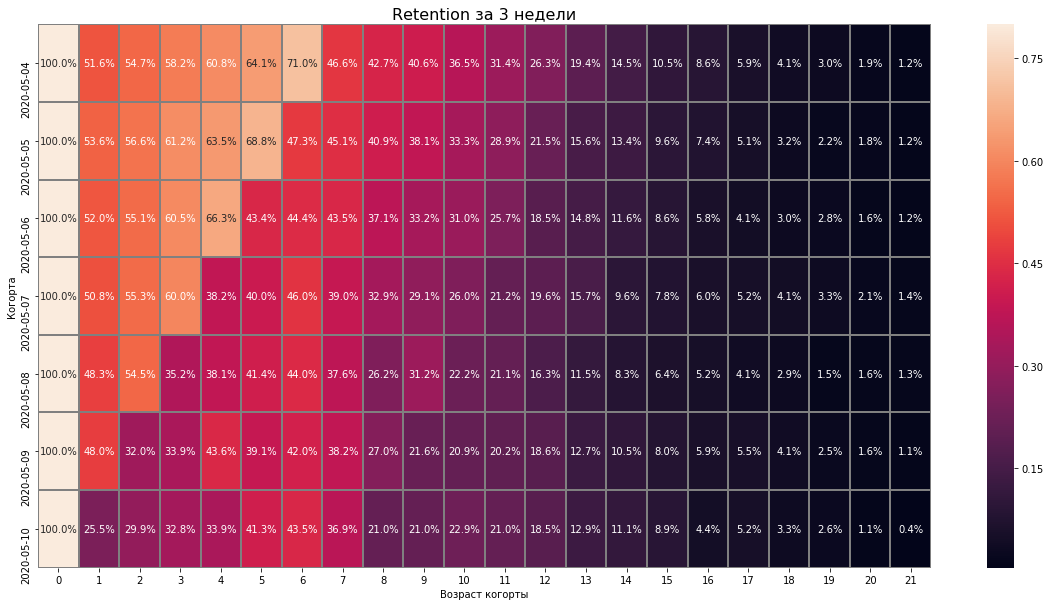

In [21]:
# построим хитмэп с retention по когортам
plt.figure(figsize=(20, 10))
sns.heatmap(retention.iloc[:, :22], 
            annot=True, fmt='.1%', linewidths=1, linecolor='gray', vmax=0.8);
plt.title('Retention за 3 недели', fontsize=16)
plt.ylabel('Когорта')
plt.xlabel('Возраст когорты');

In [22]:
print('Retention 7-го дня — {:.1%}'.format(retention.mean(axis=0)[7]))
print('Retention 10-го дня — {:.1%}'.format(retention.mean(axis=0)[10]))
print('Retention 14-го дня — {:.1%}'.format(retention.mean(axis=0)[14]))
print('Retention 21-го дня — {:.1%}'.format(retention.mean(axis=0)[21]))

Retention 7-го дня — 41.0%
Retention 10-го дня — 27.5%
Retention 14-го дня — 11.3%
Retention 21-го дня — 1.1%


На хитмэпе выше построен Retention за 3 недели для лучшей читаемости (четыре недели визуально плохо читаемы) и после 21 дня значения практически не меняются и колеблются около 0-0.5%. 
Хитмэп демонстрирует, что у пользователей самых поздних когорт retention хуже, чем у первых. 

Также стоит отметить, что несмотря на в среднем двукратное снижение на следующий день после первого дня (дня первой сессии, считаем его 0 днем в данном случае), в последующие несколько дней retention растет. У первой когорты пользователей, впервые вошедших в игру 4 мая лучший показатель retention на 6 день, у когорты от 5 мая — на 5 день, от 4 мая — на 4. В целом самая первая когорта и ее пиковый показатель 71% являются лучшим среди всех когорт. 

Хотелось бы верить в то, что такие высокие показатели 4 мая как-то связаны с днем "Звездных войн" и праздников May the 4th поклонников вселенной, однако более вероятна связь с активной рекламной кампанией накануне. 3 мая расходы на привлечение были самыми высокими за все время.

## Влияние типа источника на вероятность завершения первого уровня

In [23]:
# посчитаем расходы на рекламу по источникам
ads_cost = ads.groupby('source')['cost'].agg(['mean', 'sum']).reset_index().round(2)
ads_cost

,source,mean,sum
0,facebook_ads,305.84,2140.90
1,instagram_new_adverts,308.78,2161.44
2,yandex_direct,319.02,2233.11
3,youtube_channel_reklama,152.59,1068.12


In [24]:
# посчитаем количество людей по каждому источнику
user_sources = sources.groupby('source').count().reset_index()
user_sources.sort_values('user_id', ascending=False)

,source,user_id
2,yandex_direct,4817
1,instagram_new_adverts,3347
0,facebook_ads,2726
3,youtube_channel_reklama,2686


In [25]:
# объединим таблицы с расходами и количеством пользователей 
# для рассчета САС

costs_sources = user_sources.merge(ads_cost)
costs_sources.columns = ['source', 'n_users', 'avg_cost', 'sum_cost']

In [26]:
# посчитаем стоимость привлечения одного пользователя по каждому источнику
costs_sources['cac'] = (
    costs_sources['sum_cost'] / costs_sources['n_users']).round(2)
costs_sources = costs_sources.set_index('source')
costs_sources

,n_users,avg_cost,sum_cost,cac
source,,,,
facebook_ads,2726,305.84,2140.90,0.79
instagram_new_adverts,3347,308.78,2161.44,0.65
yandex_direct,4817,319.02,2233.11,0.46
youtube_channel_reklama,2686,152.59,1068.12,0.40


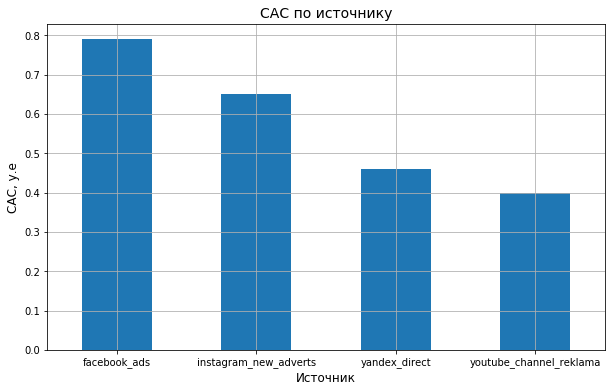

In [27]:
costs_sources['cac'].sort_values(ascending=False).plot(
        kind='bar', rot=0, 
        figsize=(10,6), grid=True, 
        legend=False)
plt.title('САС по источнику', fontsize=14)
plt.xlabel('Источник', fontsize=12)
plt.ylabel('САС, у.е', fontsize=12);

In [28]:
print('Средний САС по всем источникам — {:.2}'.format(
    costs_sources['cac'].mean()))

Средний САС по всем источникам — 0.57


In [29]:
# объединим таблицу с пользователями и источниками
actions_sources = actions.merge(sources, on='user_id')
actions_sources.head()

,event_datetime,event,building_type,user_id,project_type,session_date,session_day,cohort,source
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,2020-05-04,youtube_channel_reklama
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,2020-05-05,2020-05-04,youtube_channel_reklama
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,2020-05-05,2020-05-04,youtube_channel_reklama
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,2020-05-05,2020-05-04,youtube_channel_reklama
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,2020-05-06,2020-05-04,youtube_channel_reklama


In [30]:
# сделаем срез пользователей без учета события "строительство"
notbuilding = actions_sources.query('event != "building"')

In [31]:
# построим сводную таблицу по пользователям и количеству событий
# для дальнейшей категоризации пользователей 
notbuilding_events = notbuilding.pivot_table(
        index='user_id',
        values='event',
        aggfunc='count').reset_index()
notbuilding_events

,user_id,event
0,001d39dc-366c-4021-9604-6a3b9ff01e25,1
1,003ee7e8-6356-4286-a715-62f22a18d2a1,1
2,004074f8-251a-4776-922c-8348dca1a2f6,1
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,1
4,0056c007-c082-43cc-bdef-afc49bca4cb9,1
...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,1
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,1
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,1
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,1


In [32]:
def game_type(row):
    '''
    Категоризация пользователей по типу прохождения первого уровня 
    
    Функция делит пользователей на две группы: тех, кто прошел уровень
    через победу над врагом (pvp) и тех, кто прошел уровень завершением 
    проекта (pve). 
    Так как одно один и тот же пользователь не может построить
    два проекта или дважды завершить первый уровень, то наличие двух событий
    (цифры 2 в поле event в сводной) в таблице notbuilding_events 
    подразумевает завершение проекта. Соответственно, одно событие означает
    то, что пользователь завершил уровень иным способом, а в данном случае
    победой над врагом.
    '''
    event = row['event']
    if event == 1:
        return 'pvp'
    if event == 2:
        return 'pve'
    return 'другое'

notbuilding_events['gamer_type'] = notbuilding_events.apply(game_type, axis=1)

In [33]:
# посмотрим на соотношение пользователей 
display(notbuilding_events['gamer_type'].value_counts())
notbuilding_events['gamer_type'].value_counts(normalize=True).mul(100).round(2)

pvp    3951
pve    1866
Name: gamer_type, dtype: int64

pvp    67.92
pve    32.08
Name: gamer_type, dtype: float64

<a id='cell3'></a>    
Всего в базе 5817 пользователей, завершивших первый уровень. 3951 (68%) из них прошли уровень благодаря победе над врагом, тогда как 1866 (32%) завершили уровень посредством строительства проекта. У одного из сценариев игры достаточно существенный перевес и что самое важное, этот вариант игры подразумевает агрессивный стиль, что может приводить к меньшему количеству строительства. 

Учитывая то, что экран выбора постройки является основой для планируемой модели монетизации, этот аспект игры стоит более внимательно изучить в следуюших пунктах. Вероятно, что показ рекламы только на экране выбора постройки не самый оптимальный  вариант.

In [34]:
notbuilding_events = notbuilding_events.drop('event', axis=1)

In [35]:
# объединим таблицы с юзерами и источниками с данными по типу прохождения
actions_sources_gamertypes = actions_sources.merge(notbuilding_events, how='left', on='user_id')
actions_sources_gamertypes.head()

,event_datetime,event,building_type,user_id,project_type,session_date,session_day,cohort,source,gamer_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-04,2020-05-04,2020-05-04,youtube_channel_reklama,NaN
1,2020-05-05 05:20:15,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,2020-05-05,2020-05-04,youtube_channel_reklama,NaN
2,2020-05-05 19:24:02,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,2020-05-05,2020-05-04,youtube_channel_reklama,NaN
3,2020-05-05 20:59:19,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-05,2020-05-05,2020-05-04,youtube_channel_reklama,NaN
4,2020-05-06 00:52:56,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN,2020-05-06,2020-05-06,2020-05-04,youtube_channel_reklama,NaN


In [36]:
actions_sources_gamertypes['gamer_type'].value_counts(dropna=False)

NaN    67171
pvp    41136
pve    27333
Name: gamer_type, dtype: int64

In [37]:
# посчитаем количество строк с NaN для проверки
# должно быть 7759, т.к. всего юзеров 13756 и 5817 из них завершили уровень
actions_sources_gamertypes.query('gamer_type != gamer_type')['user_id'].nunique()

7759

In [38]:
# все строки с NaN это строки с юзерами, которые не завершили уровень
# заполним их соответствующим значением
actions_sources_gamertypes['gamer_type'].fillna('not_finished', inplace=True)
actions_sources_gamertypes['gamer_type'].value_counts()

not_finished    67171
pvp             41136
pve             27333
Name: gamer_type, dtype: int64

In [39]:
# посчитаем количество клиентов завершивших первый уровень по источникам
users_finished = actions_sources_gamertypes.query(
    'gamer_type != "not_finished"').groupby(
    'source')[['user_id']].agg('nunique').rename(
    {'user_id':'n_users_finished'}, axis=1).reset_index()
users_finished

,source,n_users_finished
0,facebook_ads,1150
1,instagram_new_adverts,1466
2,yandex_direct,2042
3,youtube_channel_reklama,1159


In [40]:
costs_sources.reset_index(inplace=True)
merged_users_sources = users_finished.merge(costs_sources)

In [41]:
# сравним проценты завершивших первый уровень юзеров по источникам
merged_users_sources['%_finished'] = (
    merged_users_sources['n_users_finished'] / 
    merged_users_sources['n_users'] * 100).round(2)

merged_users_sources

,source,n_users_finished,n_users,avg_cost,sum_cost,cac,%_finished
0,facebook_ads,1150,2726,305.84,2140.90,0.79,42.19
1,instagram_new_adverts,1466,3347,308.78,2161.44,0.65,43.80
2,yandex_direct,2042,4817,319.02,2233.11,0.46,42.39
3,youtube_channel_reklama,1159,2686,152.59,1068.12,0.40,43.15


Процент завершивших первый уровень клиентов по источникам удивительным образом практически не отличается. 
У всех источников доля завершивших первый уровень отличается не более чем на 1.6%. Гипотеза о различии в доле завершивших первый уровень пока не выглядит состоятельной. 

In [42]:
actions_sources_gamertypes['gamer_type'].value_counts()

not_finished    67171
pvp             41136
pve             27333
Name: gamer_type, dtype: int64

In [43]:
merged_users_sources

,source,n_users_finished,n_users,avg_cost,sum_cost,cac,%_finished
0,facebook_ads,1150,2726,305.84,2140.90,0.79,42.19
1,instagram_new_adverts,1466,3347,308.78,2161.44,0.65,43.80
2,yandex_direct,2042,4817,319.02,2233.11,0.46,42.39
3,youtube_channel_reklama,1159,2686,152.59,1068.12,0.40,43.15


Проверим гипотезу о влиянии источника (в нашем случае YouTube) на долю пользователей, завершивших первый уровень. Есть предположение, что так как стоимость привлечения пользователей из YouTube в среднем ниже, аудитория, пришедшая оттуда будет больше заинтересована и с большей вероятностью завершит игру.

Таким образом, нулевая гипотеза $H_0$ будет звучать так:
 `доля пользователей, завершивших первый уровень в YouTube и в каждом другом источнике будет равна`
 
Альтернативная гипотеза $H_1$: `доля пользователей, завершивших первый уровень в YouTube и в каждом другом источнике различается`

Проверим данные по YouTube с каждым другим источником.

In [44]:
# YouTube vs Facebook

# возьмем кол-во юзеров, завершивших уровень по обоим источникам
count = (merged_users_sources.loc[3, 'n_users_finished'], merged_users_sources.loc[0, 'n_users_finished'])
# возьмем кол-во пользователей в каждой из групп
nobs = (merged_users_sources.loc[3, 'n_users'], merged_users_sources.loc[0, 'n_users'])
alpha = .05
stat, pvalue = proportions_ztest(count, nobs)
print(round(pvalue, 5))

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.47374
Не получилось отвергнуть нулевую гипотезу


In [45]:
# YouTube vs Instagram
count = (merged_users_sources.loc[3, 'n_users_finished'], merged_users_sources.loc[1, 'n_users_finished'])
nobs = (merged_users_sources.loc[3, 'n_users'], merged_users_sources.loc[1, 'n_users'])
alpha = .05
stat, pvalue = proportions_ztest(count, nobs)
print(round(pvalue, 5))

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.61237
Не получилось отвергнуть нулевую гипотезу


In [46]:
# YouTube vs Yandex Direct
count = (merged_users_sources.loc[3, 'n_users_finished'], merged_users_sources.loc[2, 'n_users_finished'])
nobs = (merged_users_sources.loc[3, 'n_users'], merged_users_sources.loc[2, 'n_users'])
alpha = .05
stat, pvalue = proportions_ztest(count, nobs)
print(round(pvalue, 5))

if pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.52442
Не получилось отвергнуть нулевую гипотезу


Результаты Z-test подтвердили, что с большой вероятностью никаких различий в доле игроков, завершивших первый уровень в зависимости от источника нет. Оснований для опровержения нулевой гипотезы нет. 
Предположение, что пользователи из YouTube будут активнее играть и с большей вероятностью завершат уровень оказалось неверным.

## Среднее время прохождения при разных сценариях

In [47]:
# сделаем срез только по пользователям, которые завершили уровень 
finished = actions_sources_gamertypes.query('gamer_type != "not_finished"').drop(['session_day', 'session_date'], axis=1)
not_finished = actions_sources_gamertypes.query('gamer_type == "not_finished"').drop(['session_day', 'session_date'], axis=1)

In [48]:
# сгруппируем по пользователям и событиям, чтобы посчитать время прохождения
fin_time = finished.groupby('user_id')[['event_datetime', 'event']].agg(['min', 'max'])
fin_time

event_datetime                      \
                                                     min                 max   
user_id                                                                        
001d39dc-366c-4021-9604-6a3b9ff01e25 2020-05-05 21:02:05 2020-05-12 07:40:47   
003ee7e8-6356-4286-a715-62f22a18d2a1 2020-05-05 08:31:04 2020-05-17 21:47:49   
004074f8-251a-4776-922c-8348dca1a2f6 2020-05-04 01:07:35 2020-05-16 19:57:40   
00464e5e-28ed-4be6-bf44-517ef7b3937b 2020-05-04 08:35:29 2020-05-15 16:02:01   
0056c007-c082-43cc-bdef-afc49bca4cb9 2020-05-10 11:49:47 2020-05-16 13:48:39   
...                                                  ...                 ...   
ffd002f3-3545-423e-8dba-0c6a2d48a3aa 2020-05-06 06:34:18 2020-05-19 04:03:24   
ffe810f4-1a1f-464b-924d-6f120b0cb8df 2020-05-04 17:46:05 2020-05-18 02:03:36   
ffef4fed-164c-40e1-bde1-3980f76d0fb5 2020-05-04 01:58:59 2020-05-11 22:15:54   
fffb626c-5ab6-47c9-8113-2062a2f18494 2020-05-04 02:05:09 2020-05-12 13:01:52   
ffff69cc-fec1-4fd3-9f98-93be1112a6b8 2020-05-08 06:57:30 2020-05-25 14:05:51   

                                         event                    
                                           min               max  
user_id                                                           
001d39dc-366c-4021-9604-6a3b9ff01e25  building  finished_stage_1  
003ee7e8-6356-4286-a715-62f22a18d2a1  building  finished_stage_1  
004074f8-251a-4776-922c-8348dca1a2f6  building  finished_stage_1  
00464e5e-28ed-4be6-bf44-517ef7b3937b  building  finished_stage_1  
0056c007-c082-43cc-bdef-afc49bca4cb9  building  finished_stage_1  
...                                        ...               ...  
ffd002f3-3545-423e-8dba-0c6a2d48a3aa  building  finished_stage_1  
ffe810f4-1a1f-464b-924d-6f120b0cb8df  building  finished_stage_1  
ffef4fed-164c-40e1-bde1-3980f76d0fb5  building  finished_stage_1  
fffb626c-5ab6-47c9-8113-2062a2f18494  building  finished_stage_1  
ffff69cc-fec1-4fd3-9f98-93be1112a6b8  building           project  

[5817 rows x 4 columns]

In [49]:
# избавимся от мульти-индекса и переименуем столбцы
fin_time.columns = fin_time.columns.droplevel(0)
fin_time.reset_index(inplace=True)
fin_time.columns = ['user_id', 'start_ts', 'end_ts', 'first_event', 'last_event']
fin_time

,user_id,start_ts,end_ts,first_event,last_event
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,building,finished_stage_1
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,building,finished_stage_1
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,building,finished_stage_1
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01,building,finished_stage_1
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39,building,finished_stage_1
...,...,...,...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-06 06:34:18,2020-05-19 04:03:24,building,finished_stage_1
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-04 17:46:05,2020-05-18 02:03:36,building,finished_stage_1
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,2020-05-11 22:15:54,building,finished_stage_1
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,2020-05-12 13:01:52,building,finished_stage_1


In [50]:
# проверим корректность первого события для надежности
# у всех юзеров должно быть событие "строительство", так как начинать игру
# с проекта или завершения уровня нельзя
fin_time['first_event'].value_counts()

building    5817
Name: first_event, dtype: int64

In [51]:
# посмотрим на соотношение пользователей по последнему событию
# 3951 завершили уровень без постройки проекта (то есть победой над врагом)
# 1866 построили проект
fin_time['last_event'].value_counts()

finished_stage_1    3951
project             1866
Name: last_event, dtype: int64

In [52]:
# сделаем срезы, в которых сохраним обе группы игроков
project = fin_time.query('last_event == "project"').drop(['first_event', 'last_event'], axis=1)
battle = fin_time.query('last_event == "finished_stage_1"').drop(['first_event', 'last_event'], axis=1)

In [53]:
# посчитаем время для прохождения уровня для обеих групп в минутах
project['level_time'] = (
    project['end_ts'] - project['start_ts']).astype(
    'timedelta64[m]').astype(int)

battle['level_time'] = (
    battle['end_ts'] - battle['start_ts']).astype(
    'timedelta64[m]').astype(int)

In [54]:
display(project.head())
battle.head()

,user_id,start_ts,end_ts,level_time
7,006380d6-67a6-45de-ab1e-6eb54ad8dbe8,2020-05-04 16:43:39,2020-05-16 11:22:33,16958
12,00be7371-fa79-4fbd-b8e7-8ba32e3f8f82,2020-05-08 21:57:44,2020-05-24 19:05:12,22867
13,00c2b9f2-2615-439c-aed0-6974e4c6c1c1,2020-05-07 10:26:09,2020-05-27 11:38:47,28872
15,00de2809-403e-4476-a2f7-ca1b11700190,2020-05-04 07:48:50,2020-05-18 09:34:10,20265
16,00e83261-5fd4-4939-9616-802b5a0202c6,2020-05-05 15:49:57,2020-05-20 09:35:04,21225


,user_id,start_ts,end_ts,level_time
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,2020-05-12 07:40:47,9278
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-05 08:31:04,2020-05-17 21:47:49,18076
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-04 01:07:35,2020-05-16 19:57:40,18410
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-04 08:35:29,2020-05-15 16:02:01,16286
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-10 11:49:47,2020-05-16 13:48:39,8758


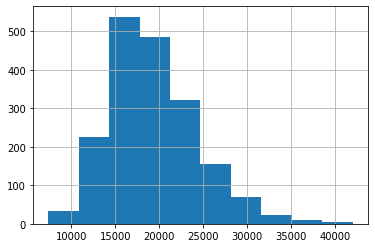

In [55]:
project['level_time'].hist();

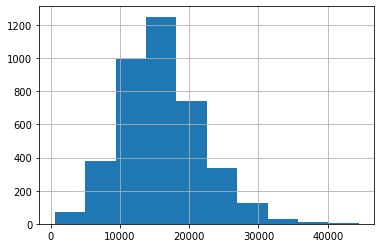

In [56]:
battle['level_time'].hist();

В обеих группах пик распределения находится в районе 15-20 тысяч минут. 
Распределения по обеим группам нельзя назвать нормальными. Проверим показатели обеих группы на "нормальность" тестом Шапиро-Уилка. 

In [57]:
alpha = 0.05 

results = st.shapiro(project['level_time'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормально') 

p-значение:  3.409758361508915e-20
Отвергаем нулевую гипотезу: распределение не нормально


In [58]:
alpha = 0.05 

results = st.shapiro(battle['level_time'])
p_value = results[1] 

print('p-значение: ', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, распределение нормально') 

p-значение:  1.7377198666599465e-21
Отвергаем нулевую гипотезу: распределение не нормально


Согласно тесту, оба распределения не нормальны, поэтому избавимся от выбросов.

In [59]:
def outliers(df, column, graphic=0, x = 7, y = 7):
    '''
    Функция для фильтрации выбросов для дальнейшего использования
    в статистическом тесте
    '''
    
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    iqr_test = (df[column] >= (q1 - 1.5 * iqr)) & (df[column] <= (q3 + 1.5 * iqr))
    if graphic == 1:
        return df.loc[iqr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[iqr_test]

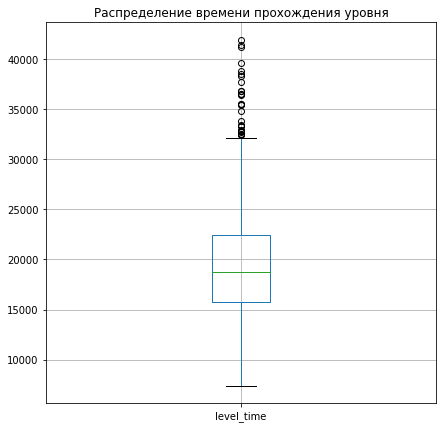

In [60]:
# боксплот с выбросами для группы игроков, построивших проект
project.boxplot('level_time', figsize=(7,7));
plt.title('Распределение времени прохождения уровня');

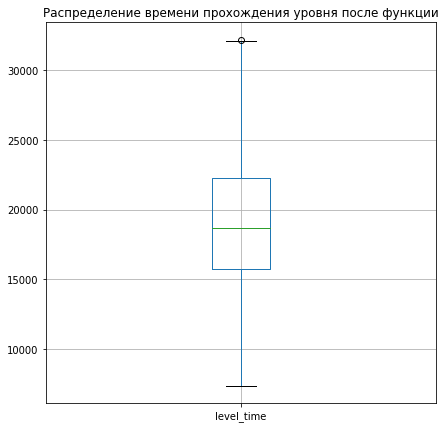

In [61]:
# боксплот после функции 
outliers(project, 'level_time', 1); 
plt.title('Распределение времени прохождения уровня после функции');

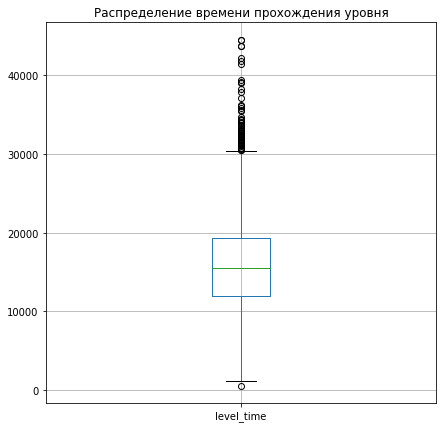

In [62]:
# боксплот с выбросами для игроков, победивших врага
battle.boxplot('level_time', figsize=(7,7));
plt.title('Распределение времени прохождения уровня');

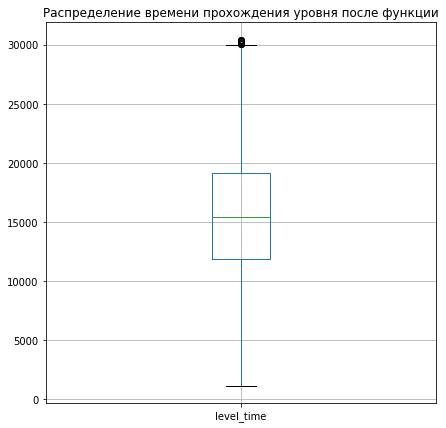

In [63]:
# боксплот после функции 
outliers(battle, 'level_time', 1); 
plt.title('Распределение времени прохождения уровня после функции');

In [64]:
# для понимания выведем средние данные
print(round(project['level_time'].mean(), 2),'— cреднее время прохождения пользователей PVE, мин')
print(round(battle['level_time'].mean(), 2),'— cреднее время прохождения пользователей PVP, мин')
print()
print(round(project['level_time'].median(), 2),'— медианное время прохождения пользователей PVE, мин')
print(round(battle['level_time'].median(), 2),'— медианное время прохождения пользователей PVP, мин')

19380.33 — cреднее время прохождения пользователей PVE, мин
15989.92 — cреднее время прохождения пользователей PVP, мин

18765.5 — медианное время прохождения пользователей PVE, мин
15541.0 — медианное время прохождения пользователей PVP, мин


**Нулевая гипотеза ($H_0$)** звучит следующим образом:
    *`время прохождения у игроков, которые заканчивают уровень через реализацию проекта, и игроков, которые заканчивают уровень победой над другим игроком одинаково`.*

**Альтернативная гипотеза $H_1$**:
    *`время прохождения у игроков, которые заканчивают уровень через реализацию проекта, и игроков, которые заканчивают уровень победой над другим игроком различается`.*

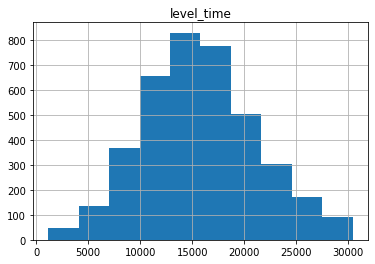

In [65]:
# распределение очищенных данных
outliers(battle, 'level_time').hist();

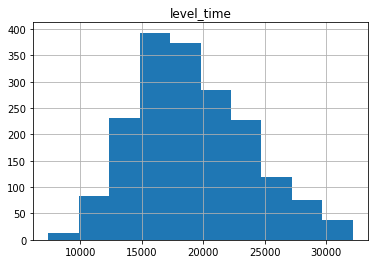

In [66]:
outliers(project, 'level_time').hist();

In [67]:
# t-test гипотезы при исходных данных и при "очищенных"

alpha = 0.05

results = st.ttest_ind(project['level_time'], battle['level_time'], equal_var=False) 
results_clean = st.ttest_ind(outliers(project, 'level_time')['level_time'], 
                             outliers(battle, 'level_time')['level_time'], 
                             equal_var=False) 

print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")
print()    
print('p-значение: ', results_clean.pvalue)

if results_clean.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")       

p-значение: 5.713141274991641e-107
Отвергаем нулевую гипотезу

p-значение:  2.112237703449074e-124
Отвергаем нулевую гипотезу


По итогам теста p-value показывает очень маленькие значения, поэтому у нас есть основания опровергнуть нулевую гипотезу. Очистка данных от выбросов не повлияла на общую ситуацию: значения p-value изменились, однако поводов принять нулевую гипотезу не появилось.

Таким образом, время прохождения первого уровня игроками разных типов скорее разные, чем одинаковые. Об этом говорят и средние, и медианные значения времени прохождения. 

Игроки, прошедшие уровень посредством строительства объекта тратили в среднем больше 13 дней на прохождение, тогда как игроки, победившие врага около 11 дней. У нас нет данных по длительности каждой игровой сессии, однако имея предварительные данные по строительству, можно предположить, что пользователи в среднем строят не больше 1-2 раз раз в день. Это позволит показывать рекламу относительно редко, чтобы выйти на окупаемость. Так, например, 1-2 рекламы в день на протяжении 10 дней, не будут ощущаться также, как 3-4 рекламы в день на протяжении 5 дней. Изучим этот вопрос в следующем пункте.

## Оптимальная модель монетизации

В [исследовании](https://www.sostav.ru/publication/mobile-ads-research-gpmd-hyper-part2-46596.html) эффективности рекламы в игровом мобильном приложении от октября 2020 компании GfK Rus упоминается высокий уровень раздражения большим количеством рекламных роликов в рамках одной игровой сессии (длительностью 24 минуты). Логичное предположение о том, что рост количества рекламы ведет к росту раздражения от нее подтверждается в исследовании.

![Раздражение от рекламы](https://i.imgur.com/IuZUvk8.png)

Чтобы по возможности снизить уровень раздражения у пользователей от рекламы можно использовать не простой показ рекламы, а видео с вознаграждением. В нашем случае, вероятно стоит обратить внимание и сделать основной упор именно на этот вид рекламы, так как этот формат меньше раздражает игрока и дает взамен какие-то полезные игровые ресурсы (предметы, ускорение строительства и т.д.). В отчете [In-game advertising the right way](https://images.response.unity3d.com/Web/Unity/%7B149b1a2e-f137-4a49-8f76-5760b58d5258%7D_UnityAds_SurveyWhitepaper_FINAL.pdf), подготовленным компанией Unity Ads (подразделением компании Unity)  отмечается, что 71% опрошенных пользователей предпочитают рекламные видео в игре платным приложениям и внутриигровым покупкам.

Однако полностью полагаться на этот формат "вслепую" крайне сложно, так как мы не можем гарантировать, что пользователь выберет вознаграждение и захочет посмотреть рекламу, а тестовых данных, на которые можно было бы ориентироваться в нашей игре нет. Поэтому в качестве оптимального варианта по форматам возможно совмещение нескольких форматов, среди которых: баннеры с видео, видео с вознаграждением и нативные форматы внутри игры. 

В том же отчете In-game advertising the right way отмечается, что 62% опрошенных игроков мобильных игр регулярно по собственной инициативе выбирают просмотр видео с вознаграждением. При этом, 52% разработчиков мобильных игр отмечают, что видео с вознаграждением являются для них самым выгодным форматом, приносящим больше всего выручки.  

Необходимо отметить, что в данном случае я не учитываю и не предлагаю нативные форматы рекламы (возможность  и внутриигровые покупки — отличные инструменты, однако их реализация требует более комплексного планирования и реализации в рамках игровых механик и структуры игры, поэтому здесь я их осознанно не рассматривал.

In [68]:
# сделаем срезы обеих групп пользователей с полными данными и всеми столбцами
pvp = actions_sources_gamertypes.query('gamer_type == "pvp"')
pve = actions_sources_gamertypes.query('gamer_type == "pve"')
# для тех, кто не завершил, ранее уже была создана таблица not_finished

Ранее в [пункте 3](#cell3) я предполагал, что агрессивная игра через победу над врагом может быть связаны с более низким объемом строительства, что может негативно сказаться на монетизации. Проверим это предположение.

In [69]:
# посмотрим на соотношение количества событий building в группах
print('PVP\t', pvp.groupby('event')['user_id'].count(), '\n')
print('PVE\t', pve.groupby('event')['user_id'].count(), '\n')
print('Не завершили\t', not_finished.groupby('event')['user_id'].count())

PVP	 event
building            37185
finished_stage_1     3951
Name: user_id, dtype: int64 

PVE	 event
building            23601
finished_stage_1     1866
project              1866
Name: user_id, dtype: int64 

Не завершили	 event
building    67171
Name: user_id, dtype: int64


Как видно по количеству событий building, предположение о малом объеме строительства у игроков в PVP формате оказалось неверным. Наоборот, количество построек среди группы PVP игроков даже больше — 37 тысяч против 23. Конечно, здесь важно сделать поправку на неравное количество пользователей в каждой из групп, поэтому для большй наглядности можно проверить количество построек на одного пользователя в среднем. 

In [70]:
print(pvp.groupby('user_id')['building_type'].count().mean().round(2), 
      'зданий в среднем построено PVP игроками')
print(pve.groupby('user_id')['building_type'].count().mean().round(2),
      'зданий в среднем построено PVE игроками')
print(not_finished.groupby('user_id')['building_type'].count().mean().round(2),
    'зданий в среднем построено игроками, не завершившими первый уровень')

9.41 зданий в среднем построено PVP игроками
12.65 зданий в среднем построено PVE игроками
8.66 зданий в среднем построено игроками, не завершившими первый уровень


In [71]:
# посчитаем сколько времени проходит между первой 
# и последней постройкой для игроков, не завершивших уровень
not_fin_time = not_finished.groupby('user_id')['event_datetime'].agg(
    ['min', 'max']).reset_index()
not_fin_time['play_time'] = (
    not_fin_time['max'] - not_fin_time['min']).astype(
    'timedelta64[m]').astype(int)
print(not_fin_time['play_time'].mean().round(2), 
      'минут в среднем между первой и последней постройкой для не завершивших уровень')

14094.49 минут в среднем между первой и последней постройкой для не завершивших уровень


Как мы выяснили, проверив гипотезу о времени прохождения ранее, среднее время прохождения первого уровня у игроков PVP и PVE достаточно заметно отличается. PVP игроки раньше заканчивают уровень (в среднем за 11 дней), соответственно, успевают меньше построить. Игроки PVE формата наоборот играют дольше (за 13 дней), поэтому успевают построить в среднем на 3 здания больше. Игроки, не завершившие уровень в среднем играют чуть меньше 10 дней, поэтому они успевают построить еще меньше зданий. 
В группах PVP игроков и тех, кто не завершил первый уровень минимальное количество построек составляет 1-2, тогда как максимальное — 19-20. В группе с PVE игроками минимальное количество построек равно 10, а максимальное — 20.

В среднем можно сделать вывод о том, что игроки всех групп в среднем строят меньше 1 здания в день. В этом случае одним из логичных вариантов будет показ рекламы не только на экране выбора постройки, но и на экранах заказа юнитов, апгрейда юнитов и зданий, экране исследовательского центра. Это касается рекламы в формате видео с вознаграждением, так как она дает бонусы и минимально раздражает игроков. Что касается стандартной рекламы (в данном случае текстовой или анимированной рекламы не на весь экран), то ее лучше разместить на одном-двух экранах, чтобы не мешать игрокам и не увеличивать отток. Это как раз может быть экран выбора постройки (текстовая реклама в какой-то части экрана не должна мешать процессу выбора постройки) и любой другой экран, подразумевающий некоторое время на изучение экрана: например, выбор юнита для строительства или апгрейда — в таком случае будет больше вероятности, что игрок увидит рекламу, но не будет раздражен, так как будет занят выбором.    

In [72]:
# вспомним таблицу с расходами на привлечение по источникам
costs_sources

,source,n_users,avg_cost,sum_cost,cac
0,facebook_ads,2726,305.84,2140.90,0.79
1,instagram_new_adverts,3347,308.78,2161.44,0.65
2,yandex_direct,4817,319.02,2233.11,0.46
3,youtube_channel_reklama,2686,152.59,1068.12,0.40


In [73]:
# посчитаем средний САС и по всем источникам и общие расходы
print(costs_sources['cac'].mean(), '— средний САС по всем источникам')
print(costs_sources['sum_cost'].sum().round(1), '— общие расходы на рекламу')

0.575 — средний САС по всем источникам
7603.6 — общие расходы на рекламу


Самым дешевым источником с точки зрения стоимости привлечения пользователей является YouTube, в котором САС в два раза меньше рекламы в Facebook: 0.40 против 0.79. Вторым наиболее выгодным источником является Яндекс Директ, где САС составляет 0.46, а пользователи из Instagram стоят 0.65 — как что-то среднее между дорогим Facebook и дешевым YouTube. Общий средний САС по всем источникам составляет 0.575, то есть порядка 58 центов. Общие расходы на рекламу по всем источникам составили $7604.

Таким образом, чтобы просто окупить всех пользователей за первый уровень, при стоимости одного показа рекламы 0.07 (7 центов) нам необходимо показать рекламу около 109 тысяч раз. В среднем пользователь играет около 10 дней, но мы возьмем запас и будем считать 7 дней, чтобы учесть большую часть игроков, которые бросают играть раньше 10 дней. В [пункте](#cell23) с рассчетом Retention мы обнаружили, что на 7 день в игру в среднем по всем когортам возвращается чуть более 40% игроков. 

Исходя из этих условий, можно использовать несколько **моделей монетизации**:

1. Сделать упор полностью на рекламных баннерах и не использовать видео с вознаграждением.
 - используем формулу: **`кол-во юзеров * стоимость одного показа * (среднее кол-во построек - 1)`**

Здесь вычитаем -1 для того, чтобы не показывать рекламу на первой постройке, чтобы не загружать пользователя рекламой сразу). Это даст выручку приблизительно в $8600, что даже позволит выйти в плюс и превысить расходы более чем на 10%.
    
  ***
    
2. Использовать рекламные баннеры только на экране выбора постройки, а также предлагать видео с вознаграждениями на каждом этапе строительства юнитов, апрегрейда построек и юнитов, исследования, после боев и т.д. 
 - используем формулу: **`кол-во юзеров * стоимость одного показа * (среднее кол-во построек / 2 - 1) + кол-во юзеров * 0.3% * стоимость одного показа * 20.`**
 
 Здесь мы используем в два раза меньше баннеров на экране постройки и также не показываем рекламу при первой постройке, а во второй части формулы подразумеваем, что реворд-видео будут просматривать только в 30% случаев, а предлагаться такие видео будут 20 раз за все время прохождения уровня. Я осознанно использовал тут нижние планки для показателей, чтобы сохранить запас. В целом за уровень длительностью около 10 дней строительств зданий, юнитов, битв и апгрейдов должно быть больше 20 раз, а согласно статистике реворд-видео просматривает 50-60% пользователей, а не 30%, но здесь я заложил подушку на случай дополнительного оттока и других возможных неординарных случаев. Более того, сокращенное количество баннеров на экране строительства также связано с тем, что выбирая реворд-видео игроки скорее всего ускорят прохождение уровня и смогут справиться раньше чем за 7-10 дней, соответственно, увидят меньше баннерной рекламы на экране постройки и больше реворд-предложений видео.
 
 При этой модели, мы сможем получить выручку $9600, что также позволит выйти в плюс и превысит расходы на привлечение на более чем на 25%. Эта модель выглядит более предпочтительно, так как включает себя несколько рекламных форматов, что само по себе должно положительно повлиять на отношение пользователей (игрокам будет позже надоедать такая реклама), а также это реворд-видео позволят удерживать пользователей дольше благодаря предлагаемым бонусам. 

In [74]:
ad_price = 0.07
total_ads_cost = 7604
avg_buildings = 10
users = 13756

In [75]:
# первый вариант монетизации: баннеры
users * ad_price * (avg_buildings - 1)

8666.28

In [76]:
# второй вариант монетизации: баннеры и реворд-видео 
(users * ad_price * (avg_buildings / 2 - 1)) + ((users * 0.3) * ad_price * 20) 

9629.2

## Выводы

В ходе исследования было обнаружено, что около 40% пользователей (5817 игроков), скачавшие игру в период с 4 по 10 мая 2020 года завершили первый уровень. Это неплохой показатель, учитывая довольно долгую длительность прохождения —  около 10 дней в среднем. 

Большая часть игроков, прошедших уровень, выбрали вариант с агрессивным стилем игры через победу над другими игроками (68%), тогда как победу через строительства проекта выбрали 32% игроков. 

Оставшаяся часть пользователей не завершила уровень, однако играла в среднем также около 10 дней. Быстрее всего прошли уровень игроки-воины: у них прохождение первого уровня занимало в среднем около 11 дней. У игроков-строителей длительность прохождения выше — порядка 13 дней. Соответственно, гипотеза о различии в среднего времени прохождения у игроков разных сценариев оказалась верной. Это подтвердил и статистический тест.

Retention rate пользователей на следующий день после регистрации тоже достаточно высокий и составляет около 50%. Более того, к 6 дню retention в среднем даже растет и доходит до пиковых значений, только потом начиная снижаться. Самыми крупными и активными когортами стали пользователи, зарегистрированные в приложении 4-5 мая — их больше 9 тысяч, что составляет почти 70% от всех игроков в базе и их retention лучший среди всех когорт. Особенно это касается когорты игроков от 4 мая: их retention rate на 6 день достигает 71%, что является очень хорошим показателем. 

Гипотеза о том, что пользователи, пришедшие из YouTube будут активнее лучше настроены на игру и больше в ней заинтересованы не оправдалась. Доли пользователей из всех источников, прошедших игру практически не отличаются и находятся в диапазоне 42-43%. 

Тем не менее, отличия в расходах на привлечение пользователей имеются. Самым дорогим источником привлечения является Facebook, где САС составляет порядка 0.8 центов, в то время как САС Youtube в два раза меньше и равен 0.4 центам. Яндекс Директ и Инстаграм находятся между этими источниками. В качестве одного из вариантов дальнейшей маркетинговой работы, можно рассмотреть увеличение расходов на YouTube засчет сокращения доли Facebook, при этом все источники рекомендуется сохранить, так как по вовлечению в игру они показывают неплохие результаты.

Для сохранения большего количества пользователей в игре, то есть, для минимизации оттока, возможно стоит обратить внимание на разные форматы рекламы, чтобы снизить раздражение у пользователей. Например, использовать формат видео с вознагражданием и ускорять скорость постройки, тем самым привлекая пользователя строить еще, далее предлагать ему вариант с рекламой и вознаграждением снова, и так далее. Поэтому в вопросе выбора модели монетизации, предпочтительным вариантом выглядит модель совмещения текстовых баннеров на некоторых экранах постройки, а также упор на видео с вознаграждениями для максимального вовлечения пользователей, а также снижения раздражения от общего количества рекламы. По предложенным рассчетам эта модель также позволит выйти в плюс более чем на 25%, однако при необходимости в дальнейшем количество рекламы и цифры можно будет скорректировать, чтобы еще больше снизить отток и, в целом, возможно будет подправить модель под требования заказчика. 